In [5]:
%run script/setup.py

# Citations information from OpenAlex

In [6]:
# load data
df_invited = pd.read_csv('Data/factInvited.csv')
df_proceedings = pd.read_csv('Data/factProceedings.csv')

df = pd.concat([df_invited, df_proceedings], ignore_index=True)
pd.set_option('display.max_rows', 15)

In [7]:
df

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity,column_equal,ID
0,Alex Sandy Pentland,2004,AAAI,Alex,Sandy,Pentland,M,206,425,1982,22,AAAI Conference on Artificial Intelligence,Artificial Intelligence,9.363636,NaN,NaN
1,Astro Teller,2004,AAAI,Astro,NaN,Teller,M,8,8,1994,10,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.800000,NaN,NaN
2,Daniel J. Clancy,2004,AAAI,Daniel,J.,Clancy,M,8,9,1996,8,AAAI Conference on Artificial Intelligence,Artificial Intelligence,1.000000,NaN,NaN
3,Edward Feigenbaum,2004,AAAI,Edward,NaN,Feigenbaum,M,39,44,1961,43,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.906977,NaN,NaN
4,Ian Lane Davis,2004,AAAI,Ian,Lane,Davis,M,1,3,1995,9,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.111111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195944,Tiziano Dalmonte,2022,WoLLIC,Tiziano,NaN,Dalmonte,M,15,15,2018,4,"Workshop on Logic, Language, Information and C...",Artificial Intelligence,3.750000,True,Tiziano Dalmonte_1
195945,Tomas Svoboda,2022,WoLLIC,Tomas,NaN,Svoboda,M,47,49,1997,25,"Workshop on Logic, Language, Information and C...",Artificial Intelligence,1.880000,True,Tomas Svoboda_1
195946,Tomoyuki Yamakami,2022,WoLLIC,Tomoyuki,NaN,Yamakami,M,98,98,1992,30,"Workshop on Logic, Language, Information and C...",Artificial Intelligence,3.266667,True,Tomoyuki Yamakami_1
195947,Valentin Cassano,2022,WoLLIC,Valentin,NaN,Cassano,M,13,13,2013,9,"Workshop on Logic, Language, Information and C...",Artificial Intelligence,1.444444,True,Valentin Cassano_1


In [8]:
full_name = df['Full name'].unique()

len(full_name)

67381

## Analysis

In [9]:
data_types = {
              'Full name' : str
             }

converters = {
              'OpenAlex ID' : pre.tranform_to_list_of_string,
              'ORCID' : pre.tranform_to_list_of_string,
              'Works count' : pre.tranform_to_list_of_int
}

df_author = pd.read_csv('Data/authorID.csv.gz', dtype=data_types, converters=converters, compression='gzip')

In [10]:
df_author

,Full name,OpenAlex ID,ORCID,Works count,Number of results
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...","[https://orcid.org/0000-0002-8053-9983, None, ...","[420, 148, 1, 1]",4
1,Astro Teller,[https://openalex.org/A5046049741],[None],[20],1
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100],1
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...","[None, None]","[199, 11]",2
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15],1
...,...,...,...,...,...
67376,Rustam Galimullin,"[https://openalex.org/A5064340585, https://ope...","[https://orcid.org/0000-0003-4195-8189, None]","[28, 1]",2
67377,Tiziano Dalmonte,[https://openalex.org/A5019687464],[https://orcid.org/0000-0002-7153-0506],[21],1
67378,Tomas Svoboda,"[https://openalex.org/A5046322438, https://ope...","[https://orcid.org/0000-0002-7184-1785, https:...","[95, 410, 13, 9, 130, 3, 2, 1, 2, 0]",10
67379,Tomoyuki Yamakami,"[https://openalex.org/A5085555714, https://ope...","[None, None]","[221, 2]",2


Checking for missing data due to API failures, authors not found on OpenAlex, and authors without a ORCID.

In [11]:
failures = 0
not_found = 0
no_ORCID = 0

missed_authors = []

for index, i in enumerate(df_author['OpenAlex ID']):

    if np.nan in i:
        failures += 1
        missed_authors.append(index)
    if None in i:
        not_found += 1

no_ORCID = 0
for i in df_author['ORCID']:

    if None in i:

        no_ORCID += 1

print('API failures:', failures, f'({round(failures/len(full_name)*100, 2)} %)')
print('Missing authors:', not_found, f'({round(not_found/len(full_name)*100, 2)} %)')
print('Missing ORCID:', no_ORCID, f'({round(no_ORCID/len(full_name)*100, 2)} %)')

API failures: 0 (0.0 %)
Missing authors: 303 (0.45 %)
Missing ORCID: 58175 (86.34 %)


Disambiguation problem: how many result I find for each author??

In [12]:
number_of_results = df_author['OpenAlex ID'].apply(len)
df_author['Number of results'] = number_of_results
multiple_authors_bc = number_of_results[number_of_results>1]
print(f"Author with multiple results: {len(multiple_authors_bc)} ({round(len(multiple_authors_bc)/len(full_name)*100, 2)} %)")

Author with multiple results: 43974 (65.26 %)


In [13]:
condition1 = number_of_results > 1
condition2 = number_of_results < 25

data = number_of_results[condition1]
data = data[condition2]

Histogram of number of results per author after excluding the unique author.

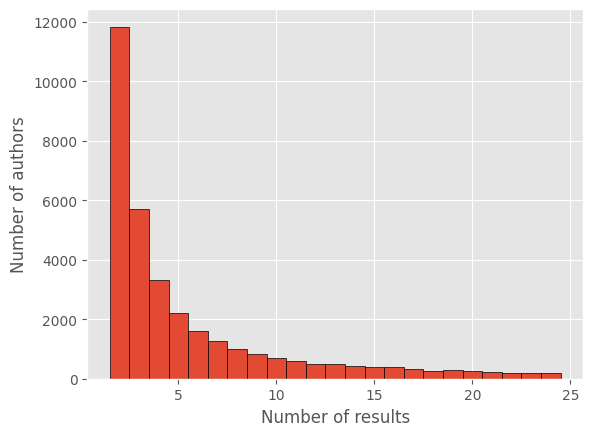

In [14]:
plt.hist(data, bins=range(min(data), max(data) + 2), edgecolor='black', align='left')
plt.ylabel('Number of authors')
plt.xlabel('Number of results')
plt.title('');

In [33]:
df_sample = df_author[0:1394]
data_nc = df_sample['Number of results']
# data_nc = data_nc[condition1]
data_nc = data_nc[condition2]

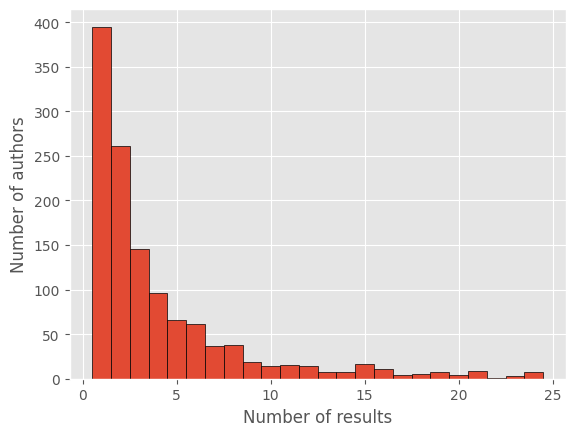

In [34]:
plt.hist(data_nc, bins=range(min(data_nc), max(data_nc) + 2), edgecolor='black', align='left')
plt.xlabel('Number of results')
plt.ylabel('Number of authors');

## Comparing cleaned and dirty dataframe

In [17]:
data_types = {
              'Full name' : str,
              'Cleaned' : bool
             }

converters = {
              'OpenAlex ID' : pre.tranform_to_list_of_string,
              'ORCID' : pre.tranform_to_list_of_string,
              'Works count' : pre.tranform_to_list_of_int
}

df_author_cleaned = pd.read_csv('Data/authorID_cleaned.csv.gz', dtype=data_types, converters=converters, compression='gzip')

In [18]:
last_cleaned = df_author_cleaned[df_author_cleaned['Cleaned'] == True].index[-1]

In [19]:
still_to_clean = len(df_author_cleaned['Cleaned'][df_author_cleaned['Cleaned'] == False])
cleaned = len(full_name) - still_to_clean
print('Cleaned authors:', cleaned, '=', round(cleaned/len(full_name)*100, 3), '%')
print('There are', last_cleaned-cleaned, 'authors for which the number of results is the same not enough among the first', last_cleaned)

Cleaned authors: 999 = 1.483 %
There are 395 authors for which the number of results is the same not enough among the first 1394


In [20]:
number_of_results = df_author_cleaned['OpenAlex ID'].apply(len)
df_author_cleaned['Number of results'] = number_of_results
multiple_authors_ac = number_of_results[number_of_results>1]
unique_result = cleaned - (len(multiple_authors_bc)-len(multiple_authors_ac))
print(f"Author with multiple results: {len(multiple_authors_ac)} ({(len(multiple_authors_ac)/len(full_name))} %)")
print('Among the', cleaned, 'cleaned authors,', unique_result, 'achieve the unique result.')

Author with multiple results: 43249 (0.6418574969204969 %)
Among the 999 cleaned authors, 274 achieve the unique result.


In [21]:
print('Filtered authors:', cleaned, f'({round((cleaned)/last_cleaned*100, 2)} %)')
print('Author with unique result after the filtering:', f'({round(unique_result/last_cleaned*100 ,2)} %)')

Filtered authors: 999 (71.66 %)
Author with unique result after the filtering: (19.66 %)


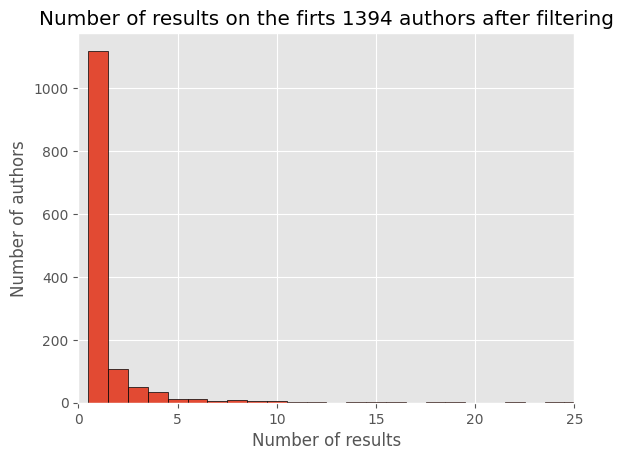

In [32]:
number_of_results = df_author_cleaned.iloc[0:last_cleaned]['Number of results'].values
# number_of_results = number_of_results[number_of_results > 1]
# Create the histogram
plt.title(f'Number of results on the firts {last_cleaned} authors after filtering')
plt.hist(number_of_results, bins=range(min(number_of_results), max(number_of_results) + 2), edgecolor='black', align='left')
plt.xlim(0,25)
plt.xlabel('Number of results')
plt.ylabel('Number of authors');

In [42]:
import seaborn as sns
palette = sns.color_palette('colorblind')

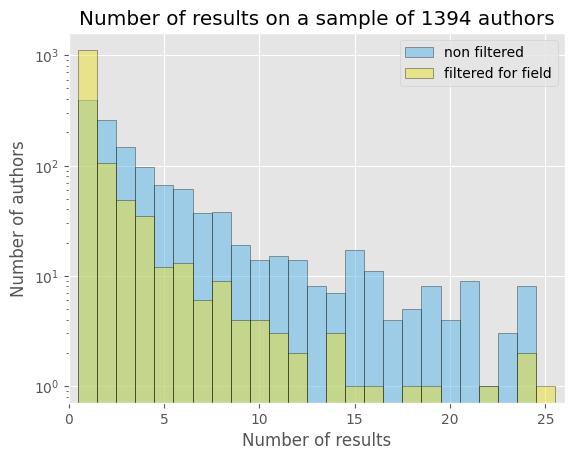

In [43]:
plt.title(f'Number of results on a sample of {last_cleaned} authors')
plt.hist(data_nc, bins=range(min(data_nc), max(data_nc) + 2), edgecolor='black', align='left', label='non filtered', alpha=0.5, color=palette[-1])
plt.hist(number_of_results, bins=range(min(number_of_results), max(number_of_results) + 2), edgecolor='black', align='left', label='filtered for field', alpha=0.5, color=palette[-2])
plt.xlim(0,26)
plt.yscale('log')
plt.xlabel('Number of results')
plt.ylabel('Number of authors')
plt.legend(loc='best');

## Second attemp on data filtering

I will use also the information of the conferences.

In [24]:
df_conferences = pd.read_excel('../Proceedings_pubblication.xlsx', sheet_name=1, dtype=data_types)

strings = []

for i in df_conferences['OA_ID']:

    strings.append(pre.tranform_to_list_of_string(i))

df_conferences['OA_ID'] = strings
df_conferences

,Conference (short),Conference (long),OA_ID,Start,End
0,WADS,Algorithms and Data Structures Symposium,[s4306421219],1989,2009
1,SWAT,Scandinavian Symposium and Workshops on Algori...,[s4306420822],2016,2020
2,SODA,Symposium on Discrete Algorithms,[S4306420974],1997,2021
3,LICS,Symposium on Logic in Computer Science,[s4306420475],1990,2021
4,STOC,Symposium on Theory of Computing,"[s4210177266, s4306421003, s142665794]",2000,2024
...,...,...,...,...,...
11,HiPC,International Conference on High Performance C...,[s4306418683],1997,2021
12,SC,Supercomputing Conference,"[s4210209929, s4306418055, s4306420075]",1988,2002
13,KDD,Conference on Knowledge Discovery and Data Mining,"[s4363608767, s4306420424]",1998,2022
14,WWW,World Wide Web Conference,"[s129236917, s4363608152]",2000,2024


In [32]:
author_id = df_author.iloc[0]['OpenAlex ID'][0]
author_name = df_author.iloc[0]['Full name']
conference_name_short = df[df['Full name'] == author_name]['Conference (short)']
conference_id = df_conferences[df_conferences['Conference (short)'] == conference_name_short]
#year = '2024'
#conference = df_conferences.iloc[0]['OA_ID'][0]
#conference = q.BASE_URL + 'sources/' + conference
#conference
conference_name_short

ValueError: Can only compare identically-labeled Series objects

In [34]:
df_conferences['Conference (short)'][0]

'WADS'

In [ ]:
ENDPOINT = 'works'
next_cursor = '*'
correspondences = 0
work_id = []

while True: 
    filter = (f'?filter=author.id:{author_id}'
            f'&per-page=200&cursor={next_cursor}'
            f'&filter=pubblication_year={year}'
            f'&filter=primary_location.source.id={conference}'
            )
    works_url = q.BASE_URL + ENDPOINT + filter + q.mail
    response_json = q.API_query(works_url)

    if response_json is True:
        break

    if 'meta' in response_json is None:
        break
    else:
        break

print(response_json)

NameError: name 'author_id' is not defined

In [4]:
data_types = {
              'Conference (short)' : str,
              'Conference (long)' : str,
              'Start' : int,
              'End' : int
             }

There are more result for one author.

In [15]:
author = df_author['Full name'].iloc[0]
df[df['Full name'] == 'Avi Pfeffer']

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity,column_equal,ID
1355,Avi Pfeffer,2004,AAAI,Avi,NaN,Pfeffer,M,31,86,1994,10,AAAI Conference on Artificial Intelligence,Artificial Intelligence,3.100000,True,Avi Pfeffer_1
1356,Avi Pfeffer,2004,AAAI,Avi,NaN,Pfeffer,M,31,86,1994,10,AAAI Conference on Artificial Intelligence,Artificial Intelligence,3.100000,True,Avi Pfeffer_1
1846,Avi Pfeffer,2005,AAAI,Avi,NaN,Pfeffer,M,35,86,1994,11,AAAI Conference on Artificial Intelligence,Artificial Intelligence,3.181818,True,Avi Pfeffer_1
3559,Avi Pfeffer,2007,AAAI,Avi,NaN,Pfeffer,M,47,86,1994,13,AAAI Conference on Artificial Intelligence,Artificial Intelligence,3.615385,True,Avi Pfeffer_1
3560,Avi Pfeffer,2007,AAAI,Avi,NaN,Pfeffer,M,47,86,1994,13,AAAI Conference on Artificial Intelligence,Artificial Intelligence,3.615385,True,Avi Pfeffer_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94616,Avi Pfeffer,2007,IJCAI,Avi,NaN,Pfeffer,M,47,86,1994,13,International Joint Conference on Artificial I...,Artificial Intelligence,3.615385,True,Avi Pfeffer_1
95606,Avi Pfeffer,2009,IJCAI,Avi,NaN,Pfeffer,M,62,86,1994,15,International Joint Conference on Artificial I...,Artificial Intelligence,4.133333,True,Avi Pfeffer_1
95607,Avi Pfeffer,2009,IJCAI,Avi,NaN,Pfeffer,M,62,86,1994,15,International Joint Conference on Artificial I...,Artificial Intelligence,4.133333,True,Avi Pfeffer_1
96359,Avi Pfeffer,2011,IJCAI,Avi,NaN,Pfeffer,M,71,86,1994,17,International Joint Conference on Artificial I...,Artificial Intelligence,4.176471,True,Avi Pfeffer_1


In [11]:
author

'Alex Sandy Pentland'

## Domains
Domains seem to be 25 but they are actually 4 and none of them is computer sciences. Most likely, computer science is the subfield within Physical Sciences domain. I do not want to try my luck.

In [ ]:
complete_url = 'https://api.openalex.org/topics'
filter = '?select=domain'
complete_url = complete_url + filter + mail
response = requests.get(complete_url).json()
domains = response['results']

https://api.openalex.org/topics?select=domain&mailto=elsa@itu.dk


In [ ]:
domains

[{'domain': {'id': 'https://openalex.org/domains/3',
   'display_name': 'Physical Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/3',
   'display_name': 'Physical Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/1',
   'display_name': 'Life Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_nam

## Search for an author by its name

In [ ]:
i = 'Stronzo bestiale'
filter = f'?search={i}&select=id,orcid,works_count'
complete_url = q.BASE_URL + q.ENDPOINT + filter
response_json = requests.get(complete_url).json()
author_data = response_json['results']

In [ ]:
author_data

[{'id': 'https://openalex.org/A5074178785', 'orcid': None, 'works_count': 3}]

Notes on how to retrieve the works of an autor from a start to an end date

In [ ]:
id = df_author_id['OpenAlex ID'][0][0]
id = id.split('/')[-1]
ENDPOINT =  'works'
filter = f'?filter=authorships.author.id:{id},from_publication_date:{start_date},to_publication_date:{end_date}'
complete_url = BASE_URL + ENDPOINT + filter + mail
print(complete_url)

Prova

In [ ]:
id = df_author_id['OpenAlex ID'][0][0]
id = id.split('/')[-1]
ENDPOINT =  'author'
filter = f'?filter=authorships.author.id:{id},from_publication_date:{start_date},to_publication_date:{end_date}'
complete_url = BASE_URL + ENDPOINT + filter + mail
print(complete_url)

## Understand how back in time I can go.

In [3]:
ENDPOINT = 'works'

for year in range(1900, 1690, -10):

    end_date = f'{year}-01-01'
    filter = f'?filter=to_publication_date:{end_date}'
    complete_url = q.BASE_URL + ENDPOINT + filter + q.mail

    response = requests.get(complete_url)
    response_json = response.json()

In [4]:
response_json

{'meta': {'count': 19523,
  'db_response_time_ms': 14,
  'page': 1,
  'per_page': 25,
  'groups_count': None},
 'results': [{'id': 'https://openalex.org/W625960733',
   'doi': 'https://doi.org/10.1093/oseo/instance.00018020',
   'title': 'An Essay concerning Human Understanding',
   'display_name': 'An Essay concerning Human Understanding',
   'publication_year': 1690,
   'publication_date': '1690-01-01',
   'ids': {'openalex': 'https://openalex.org/W625960733',
    'doi': 'https://doi.org/10.1093/oseo/instance.00018020',
    'mag': '625960733'},
   'language': 'en',
   'primary_location': {'is_oa': False,
    'landing_page_url': 'https://doi.org/10.1093/oseo/instance.00018020',
    'pdf_url': None,
    'source': {'id': 'https://openalex.org/S4306463708',
     'display_name': 'Oxford University Press eBooks',
     'issn_l': None,
     'issn': None,
     'is_oa': False,
     'is_in_doaj': False,
     'is_core': False,
     'host_organization': 'https://openalex.org/P4310311648',
     'h

I can still find result so back in time (1690). This should not worry us.